<a href="https://colab.research.google.com/github/Fredtoby/colab/blob/main/Copy_of_KDD2021_DOTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from matplotlib import pyplot as plt
import re
from keras.callbacks import *

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [20]:
tf.debugging.set_log_device_placement(True)

In [3]:
def create_sequences(values, steps):
    output = []
    for i in range(len(values) - steps):
        output.append(values[i : (i + steps)])
    return np.stack(output)


In [4]:

filename = '/content/drive/MyDrive/code/data_phase2/004_UCR_Anomaly_2500.txt'
data = pd.read_csv(filename,names=['value'])
point = 2500
n_steps = 100
dota = 1.15

train = data.iloc[:point].reset_index(drop=True)
test  = data.iloc[point:].reset_index(drop=True)
# for normalizing test data.
training_mean = train.mean()
training_std = train.std()
training_value = (train - training_mean) / training_std
print("Number of training samples:", len(training_value))
x_train = create_sequences(training_value.values,n_steps)


Number of training samples: 2500


In [21]:
model = keras.Sequential(
        [
            layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
            layers.Conv1D(
                filters=16, kernel_size=4, padding="same", strides=2, activation="relu"
            ),
            layers.Dropout(rate=0.2),
            layers.LSTM(32, return_sequences=True),
            layers.Conv1D(
                filters=8, kernel_size=4, padding="same", strides=2, activation="relu"
            ),
            layers.Conv1DTranspose(
                filters=8, kernel_size=4, padding="same", strides=2, activation="relu"
            ),
            layers.Dropout(rate=0.2),
            layers.LSTM(32, return_sequences=True
                        ),
            layers.Conv1DTranspose(
                filters=16, kernel_size=4, padding="same", strides=2, activation="relu"
            ),
            layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
        ]
    )


In [22]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 500, 16)           80        
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 500, 32)           6272      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 250, 8)            1032      
_________________________________________________________________
conv1d_transpose_6 (Conv1DTr (None, 500, 8)            264       
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 8)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 500, 32)          

In [7]:
def normalize_test(values, mean, std):
    values -= mean
    values /= std
    return values


In [8]:
def clear():
    os.system( 'cls' )

In [9]:
fileList=['001_UCR_Anomaly_35000.txt', '002_UCR_Anomaly_35000.txt', '003_UCR_Anomaly_35000.txt', '004_UCR_Anomaly_2500.txt', '005_UCR_Anomaly_4000.txt', '006_UCR_Anomaly_4000.txt', '007_UCR_Anomaly_4000.txt', '008_UCR_Anomaly_4000.txt', '009_UCR_Anomaly_4000.txt', '010_UCR_Anomaly_4000.txt', '011_UCR_Anomaly_10000.txt', '012_UCR_Anomaly_15000.txt', '013_UCR_Anomaly_15000.txt', '014_UCR_Anomaly_8000.txt', '015_UCR_Anomaly_5000.txt', '016_UCR_Anomaly_5000.txt', '017_UCR_Anomaly_5000.txt', '018_UCR_Anomaly_8000.txt', '019_UCR_Anomaly_5000.txt', '020_UCR_Anomaly_5000.txt', '021_UCR_Anomaly_5000.txt', '022_UCR_Anomaly_4000.txt', '023_UCR_Anomaly_5000.txt', '024_UCR_Anomaly_3200.txt', '025_UCR_Anomaly_2800.txt', '026_UCR_Anomaly_1700.txt', '027_UCR_Anomaly_1200.txt', '028_UCR_Anomaly_1600.txt', '029_UCR_Anomaly_2300.txt', '030_UCR_Anomaly_3000.txt', '031_UCR_Anomaly_2700.txt', '032_UCR_Anomaly_1000.txt', '033_UCR_Anomaly_4000.txt', '034_UCR_Anomaly_1500.txt', '035_UCR_Anomaly_2500.txt', '036_UCR_Anomaly_4200.txt', '037_UCR_Anomaly_5000.txt', '038_UCR_Anomaly_5000.txt', '039_UCR_Anomaly_5000.txt', '040_UCR_Anomaly_6000.txt', '041_UCR_Anomaly_7000.txt', '042_UCR_Anomaly_7000.txt', '043_UCR_Anomaly_10000.txt', '044_UCR_Anomaly_9000.txt', '045_UCR_Anomaly_14000.txt', '046_UCR_Anomaly_16000.txt', '047_UCR_Anomaly_18000.txt', '048_UCR_Anomaly_3500.txt', '049_UCR_Anomaly_3500.txt', '050_UCR_Anomaly_3500.txt', '051_UCR_Anomaly_3500.txt', '052_UCR_Anomaly_3500.txt', '053_UCR_Anomaly_1500.txt', '054_UCR_Anomaly_2700.txt', '055_UCR_Anomaly_10000.txt', '056_UCR_Anomaly_5000.txt', '057_UCR_Anomaly_6000.txt', '058_UCR_Anomaly_10000.txt', '059_UCR_Anomaly_20000.txt', '060_UCR_Anomaly_22000.txt', '061_UCR_Anomaly_24500.txt', '062_UCR_Anomaly_18500.txt', '063_UCR_Anomaly_18500.txt', '064_UCR_Anomaly_23400.txt', '065_UCR_Anomaly_3000.txt', '066_UCR_Anomaly_3700.txt', '067_UCR_Anomaly_5200.txt', '068_UCR_Anomaly_1300.txt', '069_UCR_Anomaly_3200.txt', '070_UCR_Anomaly_17555.txt', '071_UCR_Anomaly_23000.txt', '072_UCR_Anomaly_20000.txt', '073_UCR_Anomaly_60000.txt', '074_UCR_Anomaly_4000.txt', '075_UCR_Anomaly_4000.txt', '076_UCR_Anomaly_48000.txt', '077_UCR_Anomaly_58000.txt', '078_UCR_Anomaly_100000.txt', '079_UCR_Anomaly_30000.txt', '080_UCR_Anomaly_30000.txt', '081_UCR_Anomaly_45000.txt', '082_UCR_Anomaly_70000.txt', '083_UCR_Anomaly_38000.txt', '084_UCR_Anomaly_12000.txt', '085_UCR_Anomaly_10000.txt', '086_UCR_Anomaly_20000.txt', '087_UCR_Anomaly_17000.txt', '088_UCR_Anomaly_20000.txt', '089_UCR_Anomaly_100000.txt', '090_UCR_Anomaly_50000.txt', '091_UCR_Anomaly_40000.txt', '092_UCR_Anomaly_20000.txt', '093_UCR_Anomaly_35000.txt', '094_UCR_Anomaly_2500.txt', '095_UCR_Anomaly_4000.txt', '096_UCR_Anomaly_5000.txt', '097_UCR_Anomaly_5000.txt', '098_UCR_Anomaly_1200.txt', '099_UCR_Anomaly_1500.txt', '100_UCR_Anomaly_5000.txt', '101_UCR_Anomaly_6000.txt', '102_UCR_Anomaly_10000.txt', '103_UCR_Anomaly_3500.txt', '104_UCR_Anomaly_6000.txt', '105_UCR_Anomaly_24500.txt', '106_UCR_Anomaly_18500.txt', '107_UCR_Anomaly_5200.txt', '108_UCR_Anomaly_30000.txt', '109_UCR_Anomaly_35000.txt', '110_UCR_Anomaly_35000.txt', '111_UCR_Anomaly_35000.txt', '112_UCR_Anomaly_2500.txt', '113_UCR_Anomaly_4000.txt', '114_UCR_Anomaly_4000.txt', '115_UCR_Anomaly_4000.txt', '116_UCR_Anomaly_4000.txt', '117_UCR_Anomaly_4000.txt', '118_UCR_Anomaly_4000.txt', '119_UCR_Anomaly_10000.txt', '120_UCR_Anomaly_15000.txt', '121_UCR_Anomaly_15000.txt', '122_UCR_Anomaly_8000.txt', '123_UCR_Anomaly_5000.txt', '124_UCR_Anomaly_5000.txt', '125_UCR_Anomaly_5000.txt', '126_UCR_Anomaly_8000.txt', '127_UCR_Anomaly_5000.txt', '128_UCR_Anomaly_5000.txt', '129_UCR_Anomaly_5000.txt', '130_UCR_Anomaly_4000.txt', '131_UCR_Anomaly_5000.txt', '132_UCR_Anomaly_3200.txt', '133_UCR_Anomaly_2800.txt', '134_UCR_Anomaly_1700.txt', '135_UCR_Anomaly_1200.txt', '136_UCR_Anomaly_1600.txt', '137_UCR_Anomaly_2300.txt', '138_UCR_Anomaly_3000.txt', '139_UCR_Anomaly_2700.txt', '140_UCR_Anomaly_1000.txt', '141_UCR_Anomaly_4000.txt', '142_UCR_Anomaly_1500.txt', '143_UCR_Anomaly_2500.txt', '144_UCR_Anomaly_4200.txt', '145_UCR_Anomaly_5000.txt', '146_UCR_Anomaly_5000.txt', '147_UCR_Anomaly_5000.txt', '148_UCR_Anomaly_6000.txt', '149_UCR_Anomaly_7000.txt', '150_UCR_Anomaly_7000.txt', '151_UCR_Anomaly_10000.txt', '152_UCR_Anomaly_9000.txt', '153_UCR_Anomaly_14000.txt', '154_UCR_Anomaly_16000.txt', '155_UCR_Anomaly_18000.txt', '156_UCR_Anomaly_3500.txt', '157_UCR_Anomaly_3500.txt', '158_UCR_Anomaly_3500.txt', '159_UCR_Anomaly_3500.txt', '160_UCR_Anomaly_3500.txt', '161_UCR_Anomaly_1500.txt', '162_UCR_Anomaly_2700.txt', '163_UCR_Anomaly_10000.txt', '164_UCR_Anomaly_5000.txt', '165_UCR_Anomaly_6000.txt', '166_UCR_Anomaly_10000.txt', '167_UCR_Anomaly_20000.txt', '168_UCR_Anomaly_22000.txt', '169_UCR_Anomaly_24500.txt', '170_UCR_Anomaly_18500.txt', '171_UCR_Anomaly_18500.txt', '172_UCR_Anomaly_23400.txt', '173_UCR_Anomaly_3000.txt', '174_UCR_Anomaly_3700.txt', '175_UCR_Anomaly_5200.txt', '176_UCR_Anomaly_1300.txt', '177_UCR_Anomaly_3200.txt', '178_UCR_Anomaly_17555.txt', '179_UCR_Anomaly_23000.txt', '180_UCR_Anomaly_20000.txt', '181_UCR_Anomaly_60000.txt', '182_UCR_Anomaly_4000.txt', '183_UCR_Anomaly_4000.txt', '184_UCR_Anomaly_48000.txt', '185_UCR_Anomaly_58000.txt', '186_UCR_Anomaly_100000.txt', '187_UCR_Anomaly_30000.txt', '188_UCR_Anomaly_30000.txt', '189_UCR_Anomaly_45000.txt', '190_UCR_Anomaly_70000.txt', '191_UCR_Anomaly_38000.txt', '192_UCR_Anomaly_12000.txt', '193_UCR_Anomaly_10000.txt', '194_UCR_Anomaly_20000.txt', '195_UCR_Anomaly_17000.txt', '196_UCR_Anomaly_20000.txt', '197_UCR_Anomaly_100000.txt', '198_UCR_Anomaly_50000.txt', '199_UCR_Anomaly_40000.txt', '200_UCR_Anomaly_20000.txt', '201_UCR_Anomaly_10000.txt', '202_UCR_Anomaly_11411.txt', '203_UCR_Anomaly_11812.txt', '204_UCR_Anomaly_12412.txt', '205_UCR_Anomaly_9812.txt', '206_UCR_Anomaly_25130.txt', '207_UCR_Anomaly_3165.txt', '208_UCR_Anomaly_5130.txt', '209_UCR_Anomaly_19000.txt', '210_UCR_Anomaly_36123.txt', '211_UCR_Anomaly_38113.txt', '212_UCR_Anomaly_8913.txt', '213_UCR_Anomaly_33211.txt', '214_UCR_Anomaly_34211.txt', '215_UCR_Anomaly_36276.txt', '216_UCR_Anomaly_37216.txt', '217_UCR_Anomaly_38211.txt', '218_UCR_Anomaly_41117.txt', '219_UCR_Anomaly_41612.txt', '220_UCR_Anomaly_43217.txt', '221_UCR_Anomaly_45616.txt', '222_UCR_Anomaly_56123.txt', '223_UCR_Anomaly_74123.txt', '224_UCR_Anomaly_76123.txt', '225_UCR_Anomaly_81214.txt', '226_UCR_Anomaly_96123.txt', '227_UCR_Anomaly_11231.txt', '228_UCR_Anomaly_11361.txt', '229_UCR_Anomaly_16363.txt', '230_UCR_Anomaly_19363.txt', '231_UCR_Anomaly_8763.txt', '232_UCR_Anomaly_8763.txt', '233_UCR_Anomaly_18913.txt', '234_UCR_Anomaly_18913.txt', '235_UCR_Anomaly_18913.txt', '236_UCR_Anomaly_19313.txt', '237_UCR_Anomaly_19313.txt', '238_UCR_Anomaly_21311.txt', '239_UCR_Anomaly_190037.txt', '240_UCR_Anomaly_240030.txt', '241_UCR_Anomaly_250000.txt', '242_UCR_Anomaly_100000.txt', '243_UCR_Anomaly_100000.txt', '244_UCR_Anomaly_100013.txt', '245_UCR_Anomaly_100211.txt', '246_UCR_Anomaly_100211.txt', '247_UCR_Anomaly_50211.txt', '248_UCR_Anomaly_2000.txt', '249_UCR_Anomaly_2753.txt', '250_UCR_Anomaly_2951.txt']

In [23]:
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7868908015812125669, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7872780885054180242
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [25]:
filePath=r"/content/drive/MyDrive/code/data_phase2"
#fileList=os.listdir(filePath)

discords=[]  
    
for file in fileList:
    input_file=os.path.join(filePath,file)
    print(input_file)

    data = pd.read_csv(input_file,names=['value'])

    regex = re.compile(r'\d+')
    regex.findall(input_file)
    point = [int(x) for x in regex.findall(input_file)][2]

    print("point:",point)

    n_steps = 100
    check = 7

    train = data.iloc[:point].reset_index(drop=True)
    test  = data.iloc[point:].reset_index(drop=True)

    training_mean = train.mean()
    training_std = train.std()
    training_value = (train - training_mean) / training_std
    print("Number of training samples:", len(training_value))

    x_train = create_sequences(training_value.values,steps=n_steps)
    """
    my_callbacks = [
      tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10, mode="min"),
      tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/code/model.{epoch:02d}-{val_loss:.2f}.h5'),
    ]
    """

    dota_model = model.fit(
                            x_train,
                            x_train,
                            epochs=200,
                            batch_size=64,
                            validation_split=0.2,
                            #callbacks=my_callbacks,
                            callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")],
                        )

    x_train_pred = model.predict(x_train)
    train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
    threshold = np.max(train_mae_loss)

    df_test_value = (test - training_mean) / training_std

    x_test = create_sequences(df_test_value.values, n_steps)
    x_test_pred = model.predict(x_test)

    test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
    test_mae_loss = test_mae_loss.reshape((-1))
    
    anomalies = test_mae_loss > threshold * check
    if len(np.where(anomalies)[0])==0:
      anomalies = test_mae_loss > threshold * check / 1.2
      if len(np.where(anomalies)[0])==0:
        anomalies = test_mae_loss > threshold * check / 2.0
        if len(np.where(anomalies)[0])==0:
          anomalies = test_mae_loss > threshold * check / 3.5
          if len(np.where(anomalies)[0])==0:
            anomalies = test_mae_loss > threshold * check / 5
            if len(np.where(anomalies)[0])==0:
              anomalies = test_mae_loss > threshold * check / 30

    print("length", min(10,int(len(np.where(anomalies)[0]))))
    discord_idx = int(np.mean(np.where(anomalies)[0][-min(10,int(len(np.where(anomalies)[0]))):-1]))+point
    print("dis_first", np.where(anomalies)[0][1]+point)
    print("dis_mean",discord_idx)
    discords.append(discord_idx)
    print("len_discords", len(discords)) 
    

/content/drive/MyDrive/code/data_phase2/001_UCR_Anomaly_35000.txt
point: 35000
Number of training samples: 35000
Epoch 1/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0122 - val_loss: 0.0317
Epoch 2/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0115 - val_loss: 0.0315
Epoch 3/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0108 - val_loss: 0.0324
Epoch 4/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0102 - val_loss: 0.0330
Epoch 5/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0097 - val_loss: 0.0346
Epoch 6/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0092 - val_loss: 0.0364
Epoch 7/200
425/425 [==============================] - 15s 35ms/step - loss: 0.0086 - val_loss: 0.0394
length 10
dis_first 35001
dis_mean 78789
len_discords 1
/content/drive/MyDrive/code/data_phase2/002_UCR_Anomaly_35000.txt
point: 35000
Number of training samples: 350

ValueError: ignored

In [ ]:

anomalies = test_mae_loss > threshold * check
if len(np.where(anomalies)[0])==0:
  anomalies = test_mae_loss > threshold * check / 1.5
  if len(np.where(anomalies)[0])==0:
    anomalies = test_mae_loss > threshold * check / 2.5
    if len(np.where(anomalies)[0])==0:
      anomalies = test_mae_loss > threshold * check / 5
      if len(np.where(anomalies)[0])==0:
        anomalies = test_mae_loss > threshold * check / 10
        if len(np.where(anomalies)[0])==0:
          anomalies = test_mae_loss > threshold * check / 30
np.where(anomalies)[0]

array([3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175,
       3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186,
       3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197,
       3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208,
       3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219,
       3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227])

In [ ]:
anomalies = test_mae_loss > threshold * 2

In [ ]:
int(np.mean(np.where(anomalies)[0]))+point

16192

In [ ]:
np.where(anomalies)

(array([], dtype=int64),)

In [ ]:
columns1=['No.']
columns2=['location']
index=np.arange(1,251)
index=pd.DataFrame(columns=columns1, data=index)
discords_df=pd.DataFrame(columns=columns2,data=discords)

discords_df=pd.concat([index,discords_df],axis=1)
print(discords_df)

discords_df.to_csv('/content/drive/MyDrive/submission.csv', encoding='gbk')

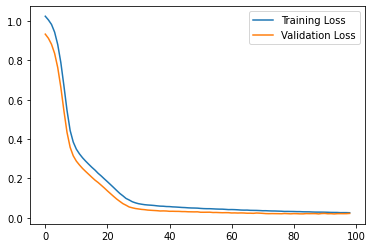

In [ ]:
plt.plot(dota_model.history["loss"], label="Training Loss")
plt.plot(dota_model.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

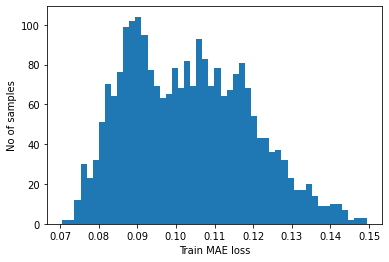

Reconstruction error threshold:  0.14937972164066696


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

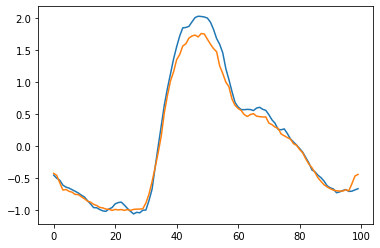

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

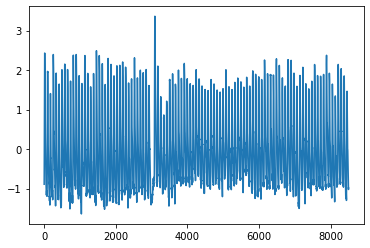

Test input shape:  (8400, 100, 1)


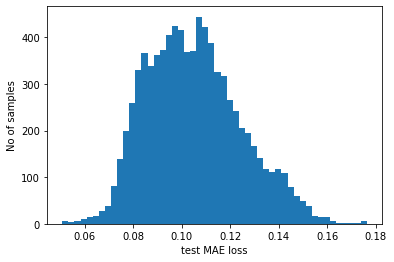

Number of anomaly samples:  7
Indices of anomaly samples:  (array([3084, 3085, 3086, 3087, 3088, 3089, 3090]),)
